This sumilates a charging circuit with only a resistor, capacitor, switch and DC voltage supply off voltage V0. At time t=0, the switch is shut and the capacitor is allowed to charge. 

For notes on this, see workbook from first year of PhD.(Or Word docccument if I ever type it up)

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import math

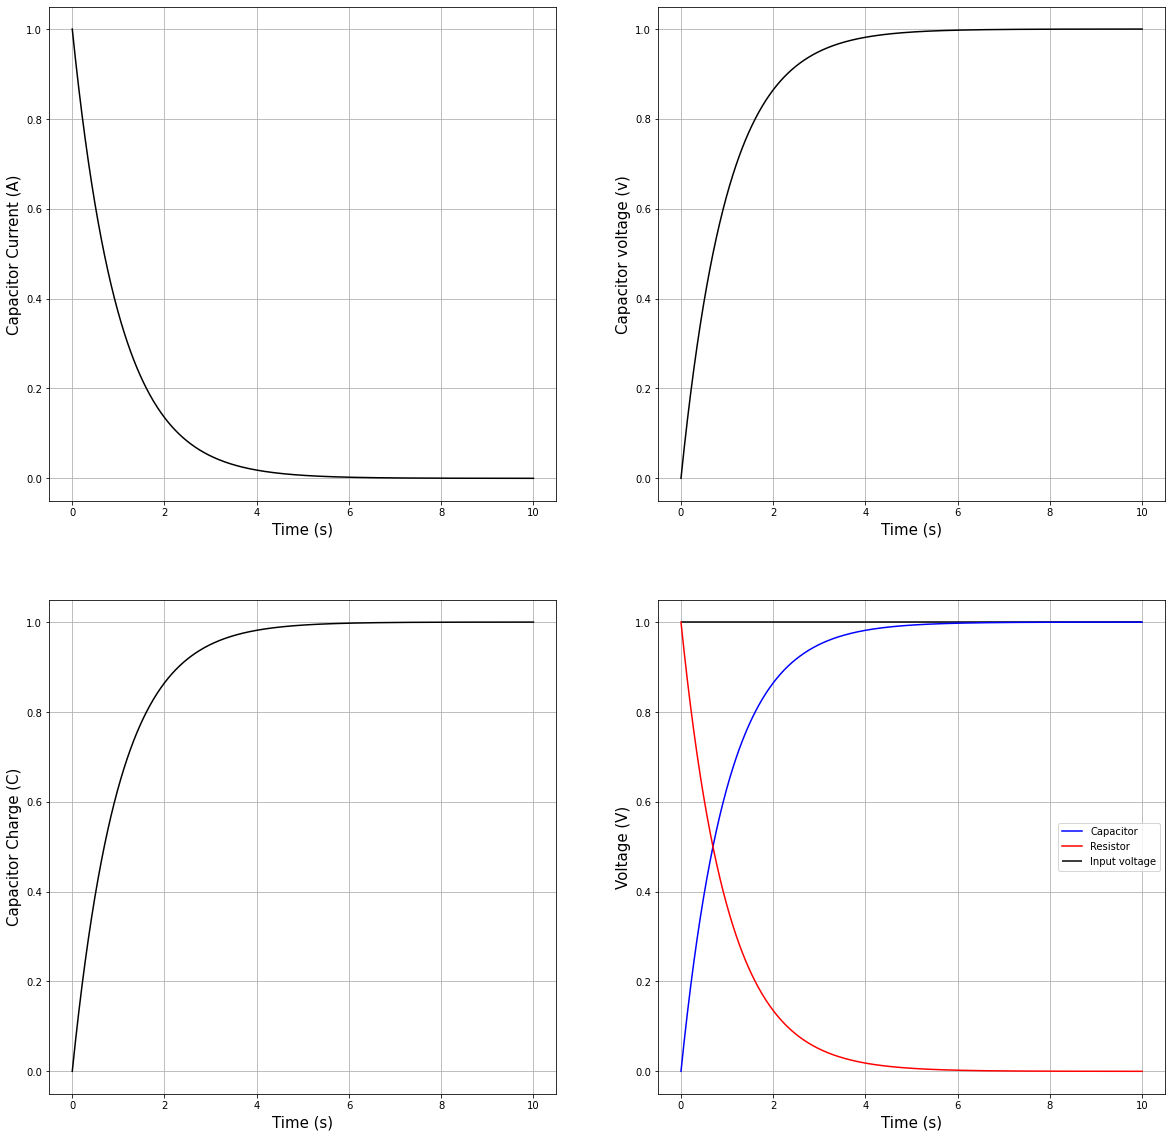

In [24]:
r = 1 #resistor's resistance
c = 1 #capacitors capacitance
v0 = 1 #DC voltage supply's v0
t = np.linspace(0,10,1000) #time array, from first number to second with 3rd's number of time steps
tc = r*c #charging circuits time constant 


def cap_cur(v0,r,tc,t):
    'calcualtes the current through the capacitor'
    dum = v0/r
    dum1 = np.exp(-t/tc)
    return(dum*dum1)

def cap_vol(v0,tc,t):
    'calculates the voltage across the capacitor'
    dum = np.exp(-t/tc)
    return(v0*(1-dum))

def cap_cha(c,v0,tc,t):
    'calcualtes the charge across the capacitor'
    dum = np.exp(-t/tc)
    return(c*v0*(1-dum))

cur=[]
vol=[]
cha=[]
vr =[]
for i in range(len(t)):
    cur.append(cap_cur(v0,r,tc,t[i]))
    vol.append(cap_vol(v0,tc,t[i]))
    cha.append(cap_cha(c,v0,tc,t[i]))
    vr.append(v0-vol[i])

    
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.plot(t,cur,color='black')
plt.ylabel('Capacitor Current (A)',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.grid()

plt.subplot(2,2,2)
plt.plot(t,vol,color='black')
plt.ylabel('Capacitor voltage (v)',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.grid()

plt.subplot(2,2,3)
plt.plot(t,cha,color='black')
plt.ylabel('Capacitor Charge (C)',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.grid()

plt.subplot(2,2,4)
plt.plot(t,vol,color='blue',label='Capacitor')
plt.plot(t,vr,color='red',label='Resistor')
plt.hlines(v0,t[0],t[-1],color='black',label='Input voltage')
plt.xlabel('Time (s)',fontsize=15)
plt.ylabel('Voltage (V)',fontsize=15)
plt.grid()
plt.legend()

plt.show()

In [43]:
def capacitor(c,v,t):
    i=[]
    for j in range(len(v)):
        if j == 0:
            i.append(0)
        else:
            dv = v[j]-v[j-1]
            dt = t[j]-t[j-1]
            i.append(c*dv/dt)
    return i 
def line (x,m,c):
    return((m*x)+c)
def sin (x,a,f,phase=0):
    'return the sin of x at frequency f with amplitude a, assuming no phase,phase needs to be given in radiens'
    return a*np.sin((2*math.pi*f*x)+phase)

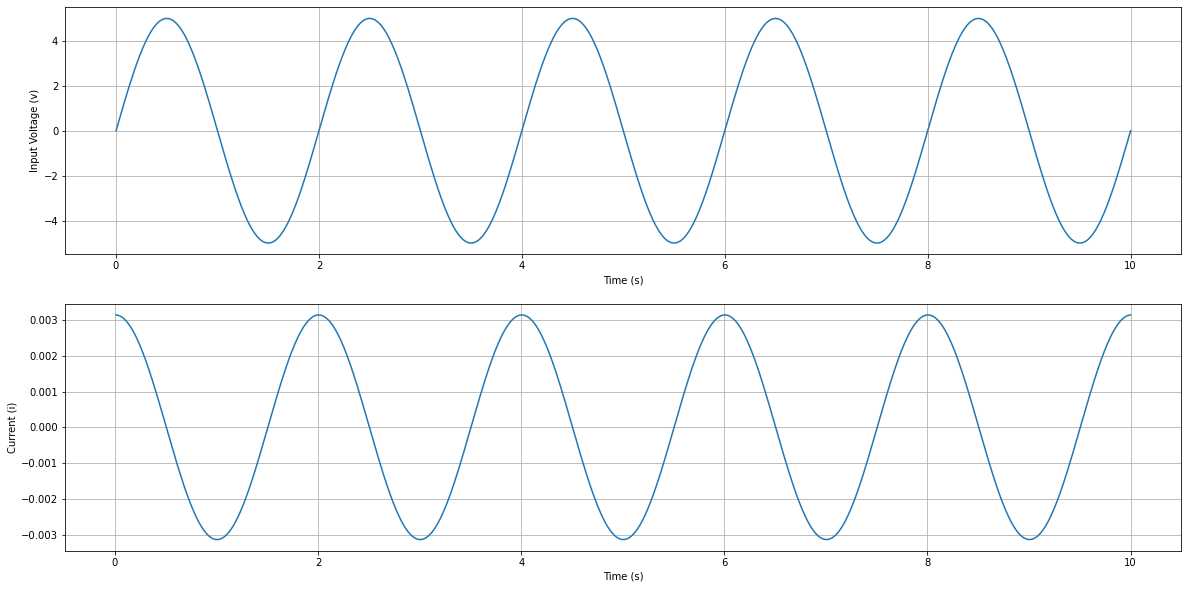

In [46]:
c = 200e-6 #capacitors capacitance
t = np.linspace(0,10,1000) #time array, from first number to second with 3rd's number of time steps

v = []
for i in range(len(t)):
    v.append(1)
#v=line(t,2,1)
v0 = 5
f = 0.5
v=sin(t,v0,f)

i = capacitor(c,v,t)

plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(t,v)
plt.xlabel('Time (s)')
plt.ylabel('Input Voltage (v)')
plt.grid()
plt.subplot(2,1,2)
plt.plot(t[1:],i[1:])
plt.xlabel('Time (s)')
plt.ylabel('Current (i)')
plt.grid()
plt.show()